# Compose example in catlab

See https://github.com/AlgebraicJulia/Structured-Epidemic-Modeling/blob/main/composition.ipynb

In [1]:
using AlgebraicPetri
using AlgebraicPetri.ModelComparison
using Catlab
using Catlab.CategoricalAlgebra
using Catlab.Programs
using Catlab.WiringDiagrams
using Catlab.Graphics.Graphviz
using Catlab.Graphics.Graphviz: Html
using Plots
using JSON
using LabelledArrays
using PrettyTables
using Catlab.WiringDiagrams, Catlab.Graphics

using GraphViz

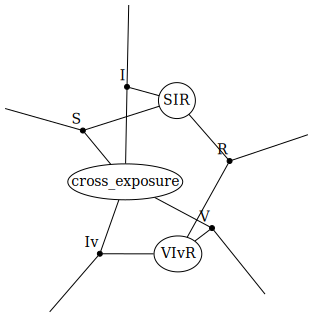

In [2]:
SVIIvR_composition_pattern = @relation (S, V, I, Iv, R) where (S, V, I, Iv, R) begin
  SIR(S, I, R)
  VIvR(V, Iv, R)
  cross_exposure(S, I, V, Iv)
end

to_graphviz(SVIIvR_composition_pattern,
    box_labels = :name, junction_labels = :variable, edge_attrs=Dict(:len => "1"))

## Create the sub models

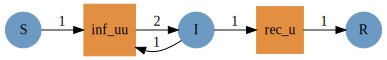

In [3]:
SIR = Open(LabelledPetriNet([:S, :I, :R],
  :inf_uu => ((:S, :I) => (:I, :I)),
  :rec_u => (:I => :R)
))

Graph(SIR)

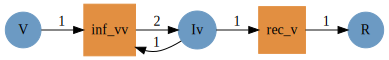

In [4]:
VIvR = Open(LabelledPetriNet([:V, :Iv, :R],
  :inf_vv => ((:V, :Iv) => (:Iv, :Iv)),
  :rec_v => (:Iv => :R)
))

Graph(VIvR)

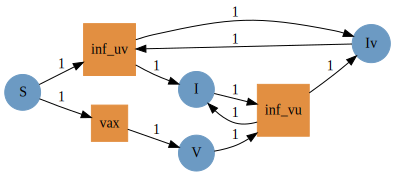

In [5]:
cross_exposure = Open(LabelledPetriNet([:S, :I, :V, :Iv],
  :inf_uv => ((:S, :Iv) => (:I, :Iv)),
  :inf_vu => ((:V, :I) => (:Iv, :I)),
  :vax => (:S => :V)
))

Graph(cross_exposure)

In [ ]:
SVIIvR = oapply(SVIIvR_composition_pattern, Dict(
  :SIR => SIR,
  :VIvR => VIvR,
  :cross_exposure => cross_exposure
)) |> apex

Graph(SVIIvR)